# Set Up

<div style="color:#FFFFFF          ; display  :fill; border-radius:90px;
           background-color:#13A4B4; font-size:10px; font-family  :cursive">
    
<p style="padding   : .1px;    color    :#FFFFFF; 
          text-align: Left;   font-size:28px; font-family  :cursive">   
&emsp;  &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&nbsp;&nbsp;&nbsp;Import Libraries <a id=3></a> </p> </div>  
<hr style='border-style: inset; margin-top: -1em; border-width: 1px;'></hr>
<p></p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from imblearn.over_sampling import SMOTE

<div style="color:#FFFFFF          ; display  :fill; border-radius:90px;
           background-color:#13A4B4; font-size:10px; font-family  :cursive">
    
<p style="padding   : .1px;    color    :#FFFFFF; 
          text-align: Left;   font-size:28px; font-family  :cursive">   
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&nbsp; Importing the Dataset <a id=6></a></p>
</div>

In [2]:
df = pd.read_csv('../input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv')
# view dimensions of dataset
df.shape

(5110, 12)

In [3]:
# preview the dataset
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


# Preparation

<div style="color:#FFFFFF          ; display  :fill; border-radius:90px;
           background-color:#13A4B4; font-size:10px; font-family  :cursive">
    
<p style="padding   : .1px;    color    :#FFFFFF; 
          text-align: Left;   font-size:28px; font-family  :cursive">      
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&nbsp;&nbsp;Explor missing values <a id=7></a></p>
</div>

Text(0.5, 1.0, 'Null Values in Data Frame')

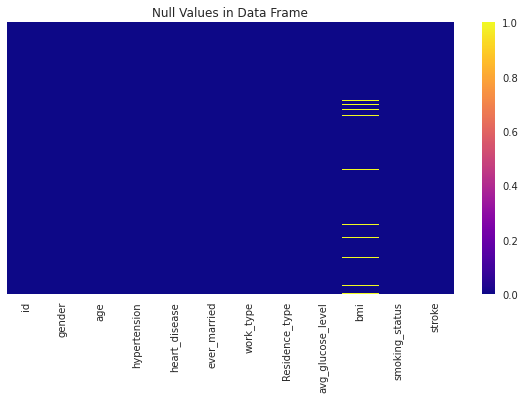

In [5]:
plt.style.use('seaborn')
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), yticklabels = False, cmap = 'plasma')
plt.title('Null Values in Data Frame')

In [6]:
# get the number of missing data points per column
missing_value_count = (df.isnull().sum())
print(missing_value_count[missing_value_count > 0])
# percent of data that is missing
total_cells = np.product(df.shape)
total_missing_value = missing_value_count.sum()
print('Percentage of missing value in Data Frame is:', total_missing_value / total_cells*100)
print('Total number of our cells is:', total_cells)
print('Total number of our missing value is:', total_missing_value)

bmi    201
dtype: int64
Percentage of missing value in Data Frame is: 0.32778864970645794
Total number of our cells is: 61320
Total number of our missing value is: 201


<div style="color:#FFFFFF          ; display  :fill; border-radius:90px;
           background-color:#13A4B4; font-size:10px; font-family  :cursive">
    
<p style="padding   : .1px;    color    :#FFFFFF; 
          text-align: Left;   font-size:28px; font-family  :cursive">      
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&nbsp;&nbsp;Handling missing values<a id=7></a></p>
</div>

In [7]:
df['bmi'].fillna(df['bmi'].mean(),inplace=True)
df['bmi'].isnull().sum()

0

In [8]:
df.drop(['id'],axis=1,inplace=True)

<div style="color:#FFFFFF          ; display  :fill; border-radius:90px;
           background-color:#13A4B4; font-size:10px; font-family  :cursive">
    
<p style="padding   : .1px;    color    :#FFFFFF; 
          text-align: Left;   font-size:28px; font-family  :cursive">      
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&nbsp;&nbsp;Clarify features<a id=7></a></p>
</div>

<hr style='border-style: inset; margin-top: -1em; border-width: 1px;'></hr>
<p></p>


1. **`age`**&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; - Age of the patient in Years

2. **`gender`**&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; - Sex of the Patient
      >>>> * Male              
      >>>> * Female
3. **` hypertension`**&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 
      >>>> * 0 = if the patient doesn't have hypertension     
      >>>> * 1 =  if the patient has hypertension
4. **`avg_glucose_level`** - average glucose level in blood

5. **`bmi`**&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; - body mass index

6. **`stroke`**&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 
      >>>> * 0 = if the patient had not a stroke                
      >>>> * 1 = if the patient had a stroke 
7. **`heart_disease`**&nbsp;&nbsp;  
      >>>> * 0 = if the patient doesn't have any heart diseases                   
      >>>> * 1 =  if the patient has a heart disease         
8. **`work_type`**&nbsp;&nbsp; 
      >>>> * children                
      >>>> * Govt_jov  
      >>>> * Never_worked
      >>>> * Private
      >>>> * Self-employed
9. **`ever_married`**&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 
      >>>> *  No                           
      >>>> *  Yes
10. **` id`**&nbsp;&nbsp; - unique identifier

11. **`Residence_type`**&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 
      >>>> * Rural                
      >>>> * Urban            
12. **`smoking_status`**&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 
      >>>> * formerly smoked                
      >>>> * never smoked  
      >>>> * smokes
      >>>> * Unknown
                 

<hr style='border-style: inset; border-width: 0.0000001px;'>

<div style="color:#FFFFFF          ; display  :fill; border-radius:90px;
           background-color:#13A4B4; font-size:10px; font-family  :cursive">
    
<p style="padding   : .1px;    color    :#FFFFFF; 
          text-align: Left;   font-size:28px; font-family  :cursive">      
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&nbsp;&nbsp;Data Preparation <a id=7></a></p>
</div>

In [9]:
# Labeling data fields to Text value for easy interpretation of Visualization
data_eda = df.copy()
#hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
data_eda["hypertension"]     = df["hypertension"]    .map({1: "Yes",           0: "No"})
#1 if the patient had a stroke or 0 if not
data_eda["stroke"]     = df["stroke"]    .map({1: "Yes",           0: "No"})
#0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
data_eda["heart_disease"]  = df["heart_disease"] .map({1: "Yes" ,           0: "No"})

# Exploratory Data Analysis(EDA)

<div style="color:#FFFFFF          ; display  :fill; border-radius:90px;
           background-color:#13A4B4; font-size:10px; font-family  :cursive">
    
<p style="padding   : .1px;    color    :#FFFFFF; 
          text-align: Left;   font-size:28px; font-family  :cursive">      
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&nbsp;Plot-Graph functions <a id=11></a></p>
</div>

In [10]:
def cnditioning_linear_plot(x,y,hue,df):
    sns.lmplot(x=x, y=y, hue=hue, data=df,
               markers=["o", "x"], palette="Set1")

In [11]:
def count_bar_plot(df,x,hue,title):
    fig = sns.countplot(x=x, hue=hue, data=df)
    fig.set_title(title)

In [12]:
def pie_graph(df,title,values):   
    labels = df[values].value_counts().index
    values = df[values].value_counts()

    fig = go.Figure(data = [
        go.Pie(
        labels = labels,
        values = values,
        hole = .5)
    ])

    fig.update_layout(title_text = title)
    fig.show()

In [13]:
def distplot(x):
    ax = sns.distplot(data_eda[x], rug=True, rug_kws={"color": "g"},
                  kde_kws={"color": "k", "lw": 3, "label": "KDE"},
                  hist_kws={"histtype": "step", "linewidth": 3,
                            "alpha": 1, "color": "g"})

In [14]:
def horizontal_bar_chart(df,x,y,color,title):    
    fig = px.bar(df, x=x, y=y, color=color,                  
                 height=600,
                 title=title)
    fig.show()

<div style="color:#FFFFFF          ; display  :fill; border-radius:90px;
           background-color:#13A4B4; font-size:10px; font-family  :cursive">
    
<p style="padding   : .1px;    color    :#FFFFFF; 
          text-align: Left;   font-size:28px; font-family  :cursive">      
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&nbsp;Descriptive Statistics <a id=11></a></p>
</div>

In [15]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


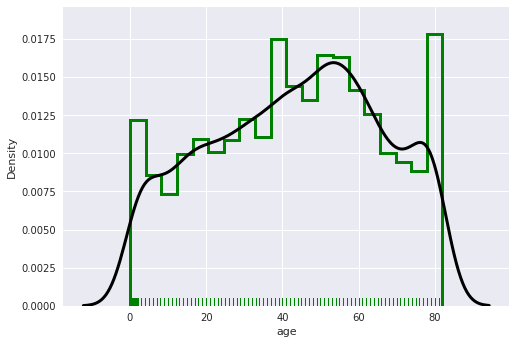

In [16]:
distplot('age')

In [17]:
## cohort analysis of age with output
def age_cohort(age):
    if   age >= 0 and age <= 20:
        return "0-20"
    elif age > 20 and age <= 40:
        return "20-40"
    elif age > 40 and age <= 50:
        return "40-50"
    elif age > 50 and age <= 60:
        return "50-60"
    elif age > 60:
        return "60+"
    
data_eda['age group'] = data_eda['age'].apply(age_cohort)
data_eda.sort_values('age group', inplace = True)

In [18]:
pie_graph(data_eda,"Age Group Distribution",'age group')

In [19]:
pie_graph(data_eda, 'Gender Distribution','gender')

In [20]:
pie_graph(data_eda, 'Hypertension Distribution','hypertension')

In [21]:
pie_graph(data_eda, ' Heart disease Distribution','heart_disease')

In [22]:
pie_graph(data_eda, 'Ever married  Distribution','ever_married')

#### body mass index distribution

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2103: FutureWarning:

The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.



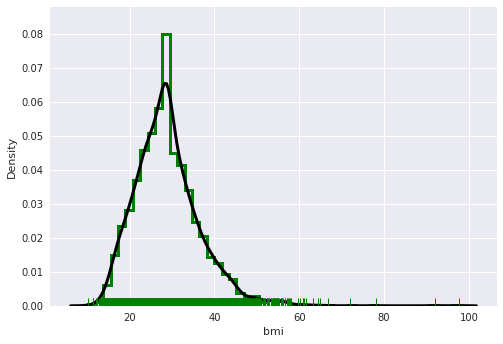

In [23]:
# body mass index distribution
distplot('bmi')

In [24]:
pie_graph(data_eda, 'Work type Distribution','work_type')

#### average glucose level in blood distribution

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2103: FutureWarning:

The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.



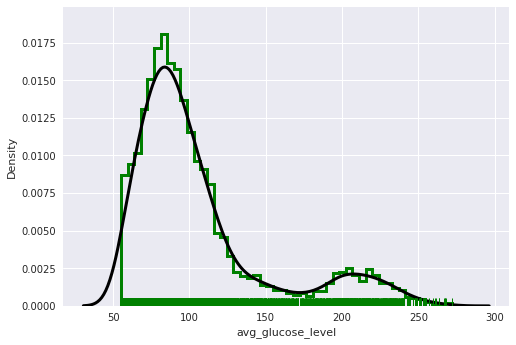

In [25]:
distplot('avg_glucose_level')

In [26]:
pie_graph(data_eda, 'Residence type Distribution','Residence_type')

In [27]:
pie_graph(data_eda,'Smoking Status Distribution','smoking_status')

In [28]:
pie_graph(data_eda, 'Stroke Distribution', 'stroke')

<div style="color:#FFFFFF          ; display  :fill; border-radius:90px;
           background-color:#13A4B4; font-size:10px; font-family  :cursive">
    
<p style="padding   : .1px;    color    :#FFFFFF; 
          text-align: Left;   font-size:28px; font-family  :cursive">      
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&nbsp;Statistcs Summary<a id=11></a></p>
</div>

<hr style='border-style: inset; margin-top: -1em; border-width: 1px;'></hr>
<p></p>


1. **`age`**&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; - Age of the patient in Years
      >>>> * We have seen that the number of people between the ages of 0 to 20 is 1025 and they represent approximately 210 percent
      >>>> * We have seen that the number of people between the ages of 20 to 40 is 1219 and they represent approximately 24 percent
      >>>> * We have seen that the number of people between the ages of 40 is 50 is 739 and they represent approximately 14 percent
      >>>> * We have seen that the number of people between the ages of 50 to 60 is 823 and they represent approximately 15 percent
      >>>> * We have seen that the number of people who 60 and older is 1304 and they represent approximately 25 percent
      >>>> * We have also seen that **Mean Age**: is approximately 43 years old and **Minimum**: 8 month and **Maximum**: 82 years old.
      
2. **`gender`**&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; - Sex of the Patient
      >>>> * Male Patients are 41.7%             
      >>>> * Female Patients are 58.6%
      >>>> * other Patients are 0.0196%
3. **` hypertension`**&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 
      >>>> *  the patient who doesn't have hypertension represent 90%     
      >>>> * the patient who has hypertension represent 10%
4. **`avg_glucose_level`** - average glucose level in blood
      >>>> * **Mean Resting Blood Pressure**: is approximately 106.1 and **Minimum**: 55.1 and **Maximum**: 82.
5. **`bmi`**&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; - body mass index
      >>>> * **Mean Resting Blood Pressure**: is approximately 28.9 and **Minimum**: 10.3 and **Maximum**: 97.3.
      >>>> * we have seen also that the majority of body mass index is between 20 and 35
6. **`stroke`**&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 
      >>>> * who have not a stroke represent 95%        
      >>>> * who have a stroke represent 5%
7. **`heart_disease`**&nbsp;&nbsp;  
      >>>> * the patient who doesn't have any heart diseases represent 94%                 
      >>>> *  the patient who has a heart disease  represent 6%        
8. **`work_type`**&nbsp;&nbsp; 
      >>>> * 13.4% of patients are children             
      >>>> * 12.9% of patients are Govt_jov  
      >>>> * 0.4% of patients are Never_worked
      >>>> * 57.2% of patients are Private
      >>>> * 16% of patients are Self-employed
9. **`ever_married`**&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 
      >>>> *  No about 35%                          
      >>>> *  Yes about 65%
10. **` id`**&nbsp;&nbsp; - unique identifier

11. **`Residence_type`**&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 
      >>>> * Rural about 49%                
      >>>> * Urban about 51%           
12. **`smoking_status`**&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 
      >>>> * 17.3% of patients are formerly smoked           >>>> * 37% of patients are never smoked  
      >>>> * 15.4% of patients are smokes
      >>>> * 30.2% of patients are Unknown
                 

<hr style='border-style: inset; border-width: 0.0000001px;'>

# Data Visualization

<div style="color:#FFFFFF          ; display  :fill; border-radius:90px;
           background-color:#13A4B4; font-size:10px; font-family  :cursive">
    
<p style="padding   : .1px;    color    :#FFFFFF; 
          text-align: Left;   font-size:28px; font-family  :cursive">      
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&nbsp;Categorical Feature (Bar Plots)<a id=11></a></p>
</div>

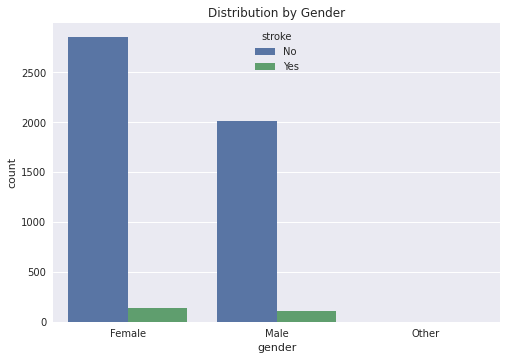

In [29]:
count_bar_plot(data_eda,'gender','stroke','Distribution by Gender')

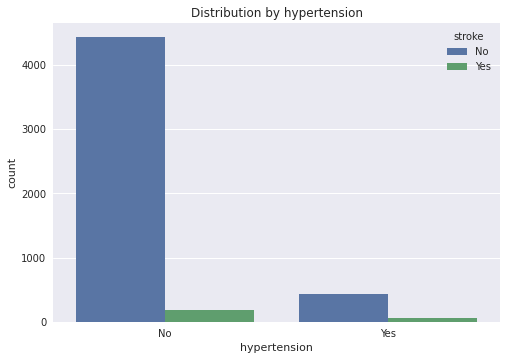

In [30]:
count_bar_plot(data_eda,'hypertension','stroke','Distribution by hypertension')

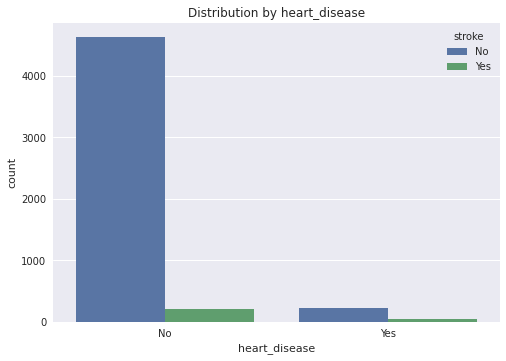

In [31]:
count_bar_plot(data_eda,'heart_disease','stroke','Distribution by heart_disease')

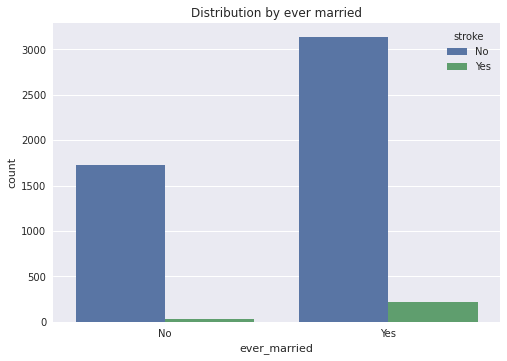

In [32]:
count_bar_plot(data_eda,'ever_married','stroke','Distribution by ever married')

In [33]:
group = data_eda.groupby(['stroke','work_type'],as_index = False).size().sort_values(by='size')
horizontal_bar_chart(df = group,x = 'stroke',y = 'size',color = 'work_type',title = 'Distribution of stroke by work type')

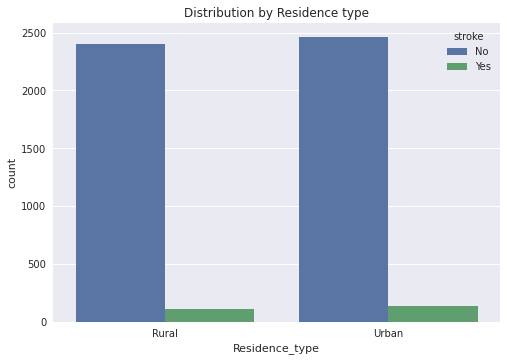

In [34]:
count_bar_plot(data_eda,'Residence_type','stroke','Distribution by Residence type')

In [35]:
group = data_eda.groupby(['stroke','smoking_status'],as_index = False).size().sort_values(by='size')
horizontal_bar_chart(df = group,x = 'stroke',y = 'size',color = 'smoking_status',title = 'Distribution of stroke by smoking status')

<div style="color:#FFFFFF          ; display  :fill; border-radius:90px;
           background-color:#13A4B4; font-size:10px; font-family  :cursive">
    
<p style="padding   : .1px;    color    :#FFFFFF; 
          text-align: Left;   font-size:28px; font-family  :cursive">      
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&nbsp;Numeric Features (Regressionplot)<a id=11></a></p>
</div>

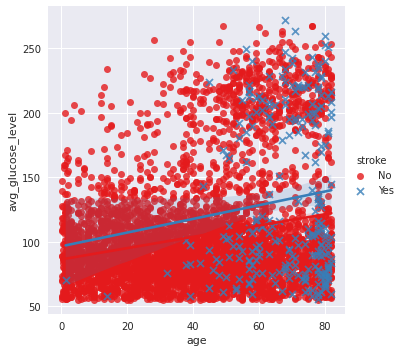

In [36]:
cnditioning_linear_plot('age','avg_glucose_level','stroke',data_eda)

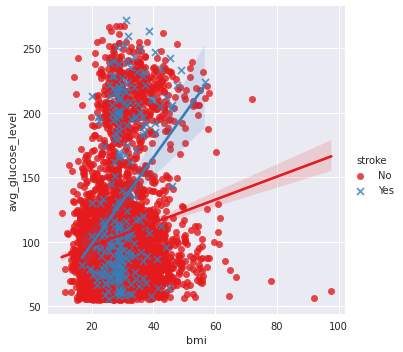

In [37]:
cnditioning_linear_plot('bmi','avg_glucose_level','stroke',data_eda)

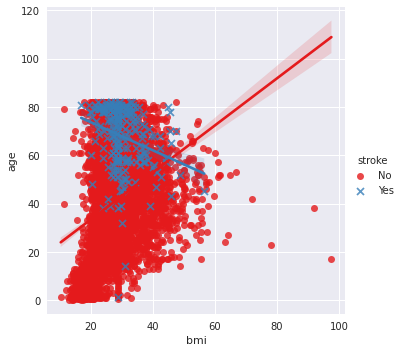

In [38]:
cnditioning_linear_plot('bmi','age','stroke',data_eda)

<div style="color:#FFFFFF          ; display  :fill; border-radius:90px;
           background-color:#13A4B4; font-size:10px; font-family  :cursive">
    
<p style="padding   : .1px;    color    :#FFFFFF; 
          text-align: Left;   font-size:28px; font-family  :cursive">      
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&nbsp;Visualization short summary<a id=11></a></p>
</div>

Avg glucose level is high with old people

BMI >40 have low avg glucose

Being unmarried reduces your risk of a stroke

Being a smoker or a formerly smoker increases your risk of having a stroke

more than 25% of strok cases They had hypertension

Female and male both have equal number of stroke cases while there is not any single case of stroke 
in other gender type.

Patient with private job have more number stroke cases then self employed and govt_job

There are few cases of strokes in children and those who are unemployed having no case
Both Urban and rural have equal number of stroke cases.so this is not a useful feature.

Stroke has the highest correlation with age

As people start to age the risk of having a stroke is increasing most of stroke cases belong to 60-80 age group that means most of patients are in their older age.

Patients with stroke having heigher avg_glucose_level then 120.


# Feature Engineering

<div style="color:#FFFFFF          ; display  :fill; border-radius:90px;
           background-color:#13A4B4; font-size:10px; font-family  :cursive">
    
<p style="padding   : .1px;    color    :#FFFFFF; 
          text-align: Left;   font-size:28px; font-family  :cursive">      
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&nbsp;Correlation Analysis<a id=11></a></p>
</div>

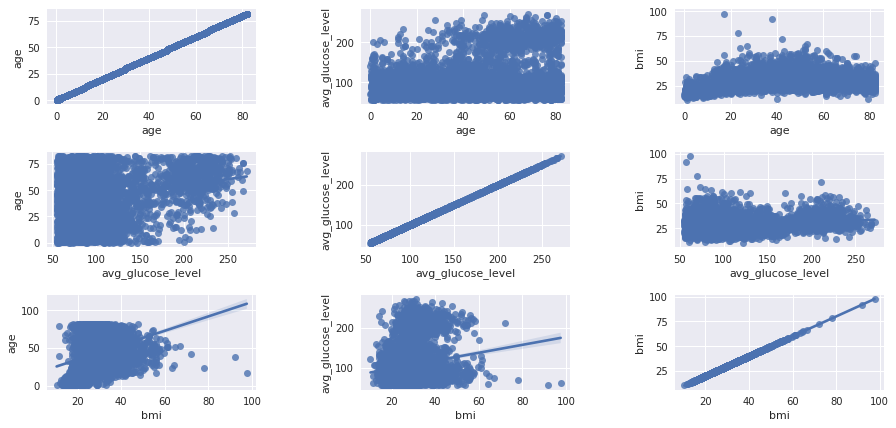

In [39]:
plt.figure(1, figsize=(15,7))
n = 0
for x in ['age','avg_glucose_level','bmi']:
    for y in ['age','avg_glucose_level','bmi']:
        n += 1
        plt.subplot(3,3,n)
        plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
        sns.regplot(x = x, y = y, data = df)
        plt.ylabel(y.split()[0] + ' ' + y.split()[1] if len(y.split()) > 1 else y)

plt.show()

* As we can see that the higher body mass index you get the higher average glucose level 
* we can also see that the the older you get the higher your body mass index will be

<AxesSubplot:>

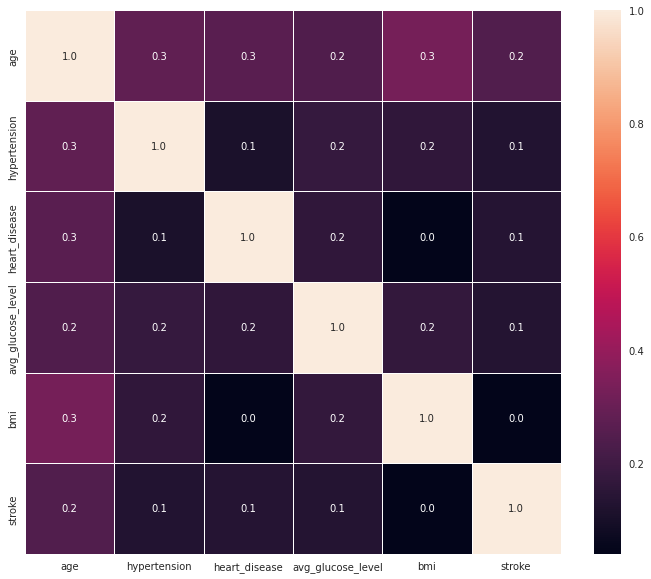

In [40]:
f, ax = plt.subplots(figsize = (12,10))
sns.heatmap(df.corr(),
            annot = True,
            linewidths = .5,
            fmt = '.1f',
            ax = ax)

In [41]:
df.corr()['stroke'].sort_values(ascending = False)

stroke               1.000000
age                  0.245257
heart_disease        0.134914
avg_glucose_level    0.131945
hypertension         0.127904
bmi                  0.038947
Name: stroke, dtype: float64

<div style="color:#FFFFFF          ; display  :fill; border-radius:90px;
           background-color:#13A4B4; font-size:10px; font-family  :cursive">
    
<p style="padding   : .1px;    color    :#FFFFFF; 
          text-align: Left;   font-size:28px; font-family  :cursive">      
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&nbsp;Converting 'object' Coulmns to 'integer'<a id=11></a></p>
</div>

In [42]:
df.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [43]:
object_col = ["gender", "ever_married" ,"Residence_type"]
label_encoder = preprocessing.LabelEncoder()
for col in object_col:
    df[col]=  label_encoder.fit_transform(df[col])

In [44]:
df.head(2)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,Private,1,228.69,36.600000,formerly smoked,1
1,0,61.0,0,0,1,Self-employed,0,202.21,28.893237,never smoked,1


In [45]:
df = pd.get_dummies(df)
df.head(2)

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,67.0,0,1,1,1,228.69,36.600000,1,0,0,1,0,0,0,1,0,0
1,0,61.0,0,0,1,0,202.21,28.893237,1,0,0,0,1,0,0,0,1,0


In [46]:
df.shape

(5110, 18)

# Pre Modeling Steps

<div style="color:#FFFFFF          ; display  :fill; border-radius:90px;
           background-color:#13A4B4; font-size:10px; font-family  :cursive">
    
<p style="padding   : .1px;    color    :#FFFFFF; 
          text-align: Left;   font-size:28px; font-family  :cursive">      
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&nbsp;Declare feature vector and target variable<a id=11></a></p>
</div>

In [47]:
X = df.drop(columns = ['stroke'])
y = df['stroke']

<div style="color:#FFFFFF          ; display  :fill; border-radius:90px;
           background-color:#13A4B4; font-size:10px; font-family  :cursive">
    
<p style="padding   : .1px;    color    :#FFFFFF; 
          text-align: Left;   font-size:28px; font-family  :cursive">      
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&nbsp;SMOTE Technique<a id=11></a></p>
</div>

* **[SMOTE](https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/)** actually creates as many synthetic examples for minority class as are requirred so that finally two target class are well represented. It does so by synthesising samples that are close to the feature space ,for the minority target class.

In [48]:
sm = SMOTE(random_state=123)
X_sm , y_sm = sm.fit_resample(X,y)

print(f'''Shape of X before SMOTE:{X.shape}
Shape of X after SMOTE:{X_sm.shape}''',"\n\n")

print(f'''Target Class distributuion before SMOTE:\n{y.value_counts(normalize=True)}
Target Class distributuion after SMOTE :\n{y_sm.value_counts(normalize=True)}''')

Shape of X before SMOTE:(5110, 17)
Shape of X after SMOTE:(9722, 17) 


Target Class distributuion before SMOTE:
0    0.951272
1    0.048728
Name: stroke, dtype: float64
Target Class distributuion after SMOTE :
1    0.5
0    0.5
Name: stroke, dtype: float64


<div style="color:#FFFFFF          ; display  :fill; border-radius:90px;
           background-color:#13A4B4; font-size:10px; font-family  :cursive">
    
<p style="padding   : .1px;    color    :#FFFFFF; 
          text-align: Left;   font-size:28px; font-family  :cursive">      
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&nbsp;Split data into separate training and test set<a id=11></a></p>
</div>

In [49]:
X_train, X_test, y_train, y_test = train_test_split(
    X_sm,
    y_sm,
    test_size = .2,
    random_state = 777)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((7777, 17), (7777,), (1945, 17), (1945,))

<div style="color:#FFFFFF          ; display  :fill; border-radius:90px;
           background-color:#13A4B4; font-size:10px; font-family  :cursive">
    
<p style="padding   : .1px;    color    :#FFFFFF; 
          text-align: Left;   font-size:28px; font-family  :cursive">      
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&nbsp;Feature Scaling<a id=11></a></p>
</div>

In [50]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Apply Machine Learning Models

<div style="color:#FFFFFF          ; display  :fill; border-radius:90px;
           background-color:#13A4B4; font-size:10px; font-family  :cursive">
    
<p style="padding   : .1px;    color    :#FFFFFF; 
          text-align: Left;   font-size:28px; font-family  :cursive">      
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&nbsp;Build Random Forest Classifier
and evaluate the model<a id=11></a></p>
</div>

Testing-set Accuracy score is: 0.9681233933161953
Training-set Accuracy score is: 1.0


<AxesSubplot:>

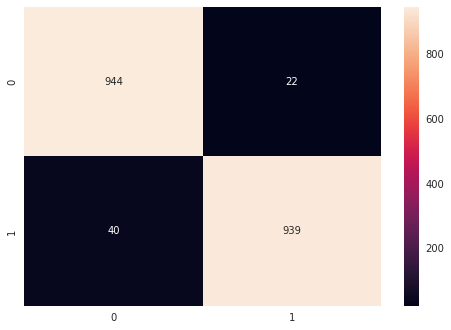

In [51]:
clf_rf = RandomForestClassifier(random_state=777)
clf_rf = clf_rf.fit(X_train,y_train)
y_pred_rf = clf_rf.predict(X_test)
acc = accuracy_score(y_test, y_pred_rf)
print('Testing-set Accuracy score is:', acc)
print('Training-set Accuracy score is:',accuracy_score(y_train,clf_rf.predict(X_train)))
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot = True, fmt = "d")

<div style="color:#FFFFFF          ; display  :fill; border-radius:90px;
           background-color:#13A4B4; font-size:10px; font-family  :cursive">
    
<p style="padding   : .1px;    color    :#FFFFFF; 
          text-align: Left;   font-size:28px; font-family  :cursive">      
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&nbsp;Build Ada Boost Classifier
and evaluate the model<a id=11></a></p>
</div>

AdaBoost Classifier Model Accuracy is: 0.9172236503856042


<AxesSubplot:>

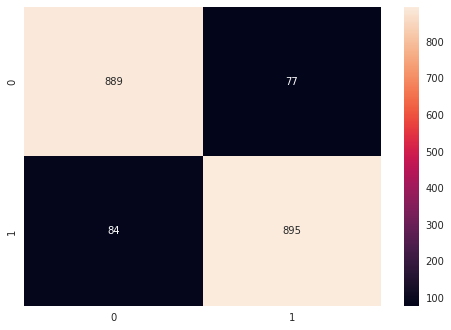

In [52]:
abc = AdaBoostClassifier(n_estimators = 50,
                         learning_rate = 1, 
                         random_state = 777)
abc.fit(X_train,y_train)
y_pred_abc = abc.predict(X_test)
acc = accuracy_score(y_test, y_pred_abc)
print('AdaBoost Classifier Model Accuracy is:',acc)
cm = confusion_matrix(y_test, y_pred_abc)
sns.heatmap(cm, annot = True, fmt="d")

<div style="color:#FFFFFF          ; display  :fill; border-radius:90px;
           background-color:#13A4B4; font-size:10px; font-family  :cursive">
    
<p style="padding   : .1px;    color    :#FFFFFF; 
          text-align: Left;   font-size:28px; font-family  :cursive">      
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&nbsp;Build Gradient Boosting Classifier
and evaluate the model<a id=11></a></p>
</div>

Gradient Boosting Classifier Model Accuracy score is: 0.9475578406169666


<AxesSubplot:>

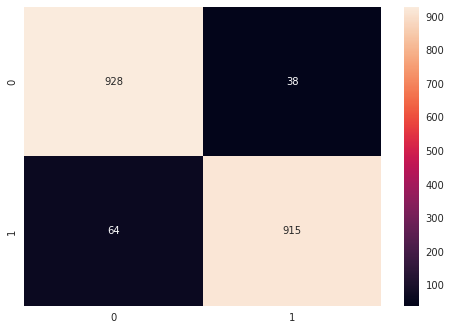

In [53]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)
acc = accuracy_score(y_test, gb_pred)
print("Gradient Boosting Classifier Model Accuracy score is:", acc)
cm = confusion_matrix(y_test, gb_pred)
sns.heatmap(cm, annot = True, fmt="d")

<div style="color:#FFFFFF          ; display  :fill; border-radius:90px;
           background-color:#13A4B4; font-size:10px; font-family  :cursive">
    
<p style="padding   : .1px;    color    :#FFFFFF; 
          text-align: Left;   font-size:28px; font-family  :cursive">      
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&nbsp;Build KNN Model 
and evaluate the model<a id=11></a></p>
</div>

KNN Model Acuuracy is: 0.9491002570694087


<AxesSubplot:>

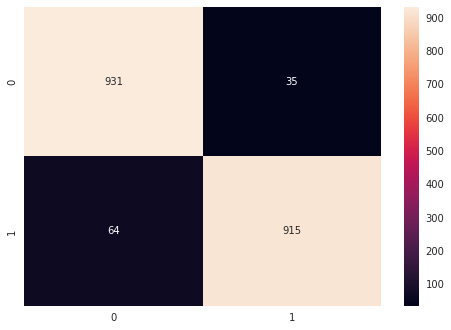

In [54]:
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
acc = knn.score(X_test, y_test)
print("KNN Model Acuuracy is:", acc)
cm = confusion_matrix(y_test, knn_pred)
sns.heatmap(cm, annot = True, fmt="d")

<div style="color:#FFFFFF          ; display  :fill; border-radius:90px;
           background-color:#13A4B4; font-size:10px; font-family  :cursive">
    
<p style="padding   : .1px;    color    :#FFFFFF; 
          text-align: Left;   font-size:28px; font-family  :cursive">      
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&nbsp;Build SVC Model
and evaluate the model<a id=11></a></p>
</div>

SVC Accuracy score is: 0.9465295629820052


<AxesSubplot:>

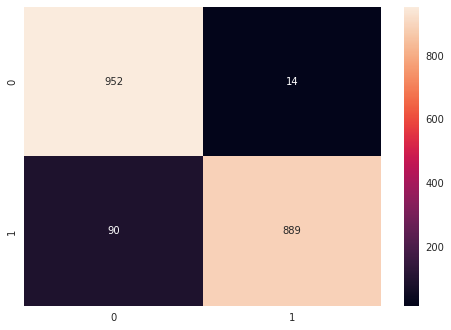

In [55]:
svc = SVC(random_state = 777)
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)
acc = svc.score(X_test, y_test)
print("SVC Accuracy score is:", acc)
cm = confusion_matrix(y_test, svc_pred)
sns.heatmap(cm, annot = True, fmt = "d")

<div style="color:#FFFFFF          ; display  :fill; border-radius:90px;
           background-color:#13A4B4; font-size:10px; font-family  :cursive">
    
<p style="padding   : .1px;    color    :#FFFFFF; 
          text-align: Left;   font-size:28px; font-family  :cursive">      
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&nbsp;Build Logistic Regression Model
and evaluate the model<a id=11></a></p>
</div>

In [56]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
acc = lr.score(X_test, y_test)
print("LogisticRegression accuracy score is:",acc)
report = classification_report(y_test, lr_pred)
print(report)

LogisticRegression accuracy score is: 0.9244215938303342
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       966
           1       0.96      0.88      0.92       979

    accuracy                           0.92      1945
   macro avg       0.93      0.92      0.92      1945
weighted avg       0.93      0.92      0.92      1945



<div style="color:#FFFFFF          ; display  :fill; border-radius:90px;
           background-color:#13A4B4; font-size:10px; font-family  :cursive">
    
<p style="padding   : .1px;    color    :#FFFFFF; 
          text-align: Left;   font-size:28px; font-family  :cursive">      
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&nbsp;Build Decision Tree Classifier
and evaluate the model<a id=11></a></p>
</div>

Decision Tree accuracy score is : 0.9419023136246787


<AxesSubplot:>

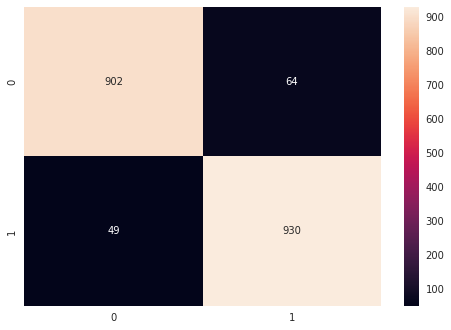

In [57]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
acc = accuracy_score(y_test, dt_pred)
print("Decision Tree accuracy score is :",acc)
cm = confusion_matrix(y_test, dt_pred)
sns.heatmap(cm, annot = True, fmt = "d")

0:	learn: 0.6474128	total: 60ms	remaining: 240ms
1:	learn: 0.5946898	total: 62.2ms	remaining: 93.3ms
2:	learn: 0.5613268	total: 64.3ms	remaining: 42.8ms
3:	learn: 0.5332584	total: 66.3ms	remaining: 16.6ms
4:	learn: 0.5033241	total: 68.3ms	remaining: 0us
Cat Boost Classifier accuracy score is: 0.87146529562982


<AxesSubplot:>

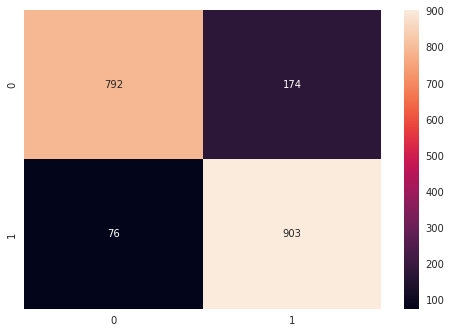

In [58]:
cbc = CatBoostClassifier( iterations=5, 
                          learning_rate=0.1 )
cbc = cbc.fit(X_train,y_train)
cbc_pred = cbc.predict(X_test)
acc = accuracy_score(y_test,cbc_pred)
print("Cat Boost Classifier accuracy score is:",acc)
cm = confusion_matrix(y_test,cbc_pred)
sns.heatmap(cm, annot = True, fmt = "d")

<div style="color:#FFFFFF          ; display  :fill; border-radius:90px;
           background-color:#13A4B4; font-size:10px; font-family  :cursive">
    
<p style="padding   : .1px;    color    :#FFFFFF; 
          text-align: Left;   font-size:28px; font-family  :cursive">      
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&nbsp;Build Voting Classifier
and evaluate the model<a id=11></a></p>
</div>

Let's select best 3 models: 
(RandomForestClassifier acc: 0.968%,

KNeighborsClassifier acc: 0.949%,

GradientBoostingClassifier acc: 0.947%) to build Voting Classifier model

Voting Classifier Accuracy Score is: 
0.9701799485861182


<AxesSubplot:>

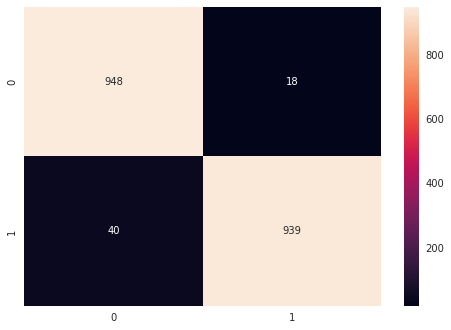

In [59]:
clf1 = GradientBoostingClassifier()
clf2 = RandomForestClassifier()
clf3 =  KNeighborsClassifier(n_neighbors = 10)
eclf1 = VotingClassifier(estimators=[('gbc', clf1), ('lr', clf2), ('abc', clf3)], voting='soft')
eclf1.fit(X_train, y_train)
predictions = eclf1.predict(X_test)
print("Voting Classifier Accuracy Score is: ")
print(accuracy_score(y_test, predictions))
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot = True, fmt="d")

* Cool! we got 97% accuracy with 'VotingClassifier'

* so this is the end if you have any questions or advice for me please write in the comment.

<div style="color:#FFFFFF          ; display  :fill; border-radius:90px;
           background-color:#13A4B4; font-size:10px; font-family  :cursive">
    
<p style="padding   : .1px;    color    :#FFFFFF; 
          text-align: Left;   font-size:28px; font-family  :cursive">      
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&nbsp;I hope that the notebook was useful and I hope you like it<a id=11></a></p>
</div>